# Code setup

In [1]:
import numpy as np

from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 200  # Set figure resolution in dots per inch (dpi)

def plot_discontinuous(x, y, discontinuity_x = 0, color = 'C0', markersize = 12):
    ''' Plots data with a discontinuity at x = discontinuity_x. '''
    xd = discontinuity_x
    plt.plot(x[x < xd], y[x < xd], color = color)
    plt.plot(x[x >= xd], y[x >= xd], color = color)
    plt.plot([xd, xd], [0, *y[x == xd]], '--', color = color)
    plt.plot([xd], [0], 'o', color = color, markersize = markersize)
    plt.plot([xd], y[x == xd], 'o', color = color, markersize = markersize, markerfacecolor = 'white')

def prepare_plots(amount, x = None, y = None):
    ''' Prepares a figure containing a given number of plots. '''
    fig, axs = plt.subplots(1, amount)
    fig.set_figwidth(fig.get_figwidth() * amount)
    for ax in axs:
        plt.sca(ax)
        if x is not None:
            plt.xlabel(x)
        if y is not None:
            plt.ylabel(y)
    return fig, axs

t = np.linspace(-5, 10, 1000)
E = 19E6
mu = 12E6

# Kelvin-Voigt model

The Kelvin-Voigt model of viscoelasticity, or Kelvin-Voigt solid, is a spring in parallel with a dashpot.

Overall stress & strain:

&emsp;&emsp;$ \sigma = E\varepsilon + \mu\dot\varepsilon\ $ (differential equation)

&emsp;&emsp;$E$: spring's elastic modulus.

&emsp;&emsp;$\mu$: dashpot's viscosity.

## Terms we'll use

The Heaviside step function is like a stairstep from 0 to 1. There are a few ways people define it, but we'll use this one:
$$ S(t) = \begin{cases} 0 & \textrm{if } t < 0\\ 1 & \textrm{if } t \geq 0. \end{cases} $$

In [2]:
@np.vectorize
def step(x):
    return 0 if x < 0 else 1

## Step stress (creep)
Stress steps from 0 to $\sigma_0$ when the experiment starts ($t=0$):

&emsp;&emsp;$ \sigma(t) = \sigma_0S(t)$.

In response, strain creeps (or rather, catapults) up before approaching $\frac{\sigma_0}{E}$:

&emsp;&emsp;$ \varepsilon(t) = \frac{\sigma_0}{E}\bigl( 1-e^{-t/\tau_c} \bigr)$ when $t\geq0$, where $\tau_c = \frac{\mu}{E}$ is the Kelvin-Voigt creep time constant.

While Maxwell fluids jump to $\varepsilon(0) = \varepsilon_0$ before creeping at a constant rate, Kelvin-Voigt solids start at $\varepsilon(0) = 0$.

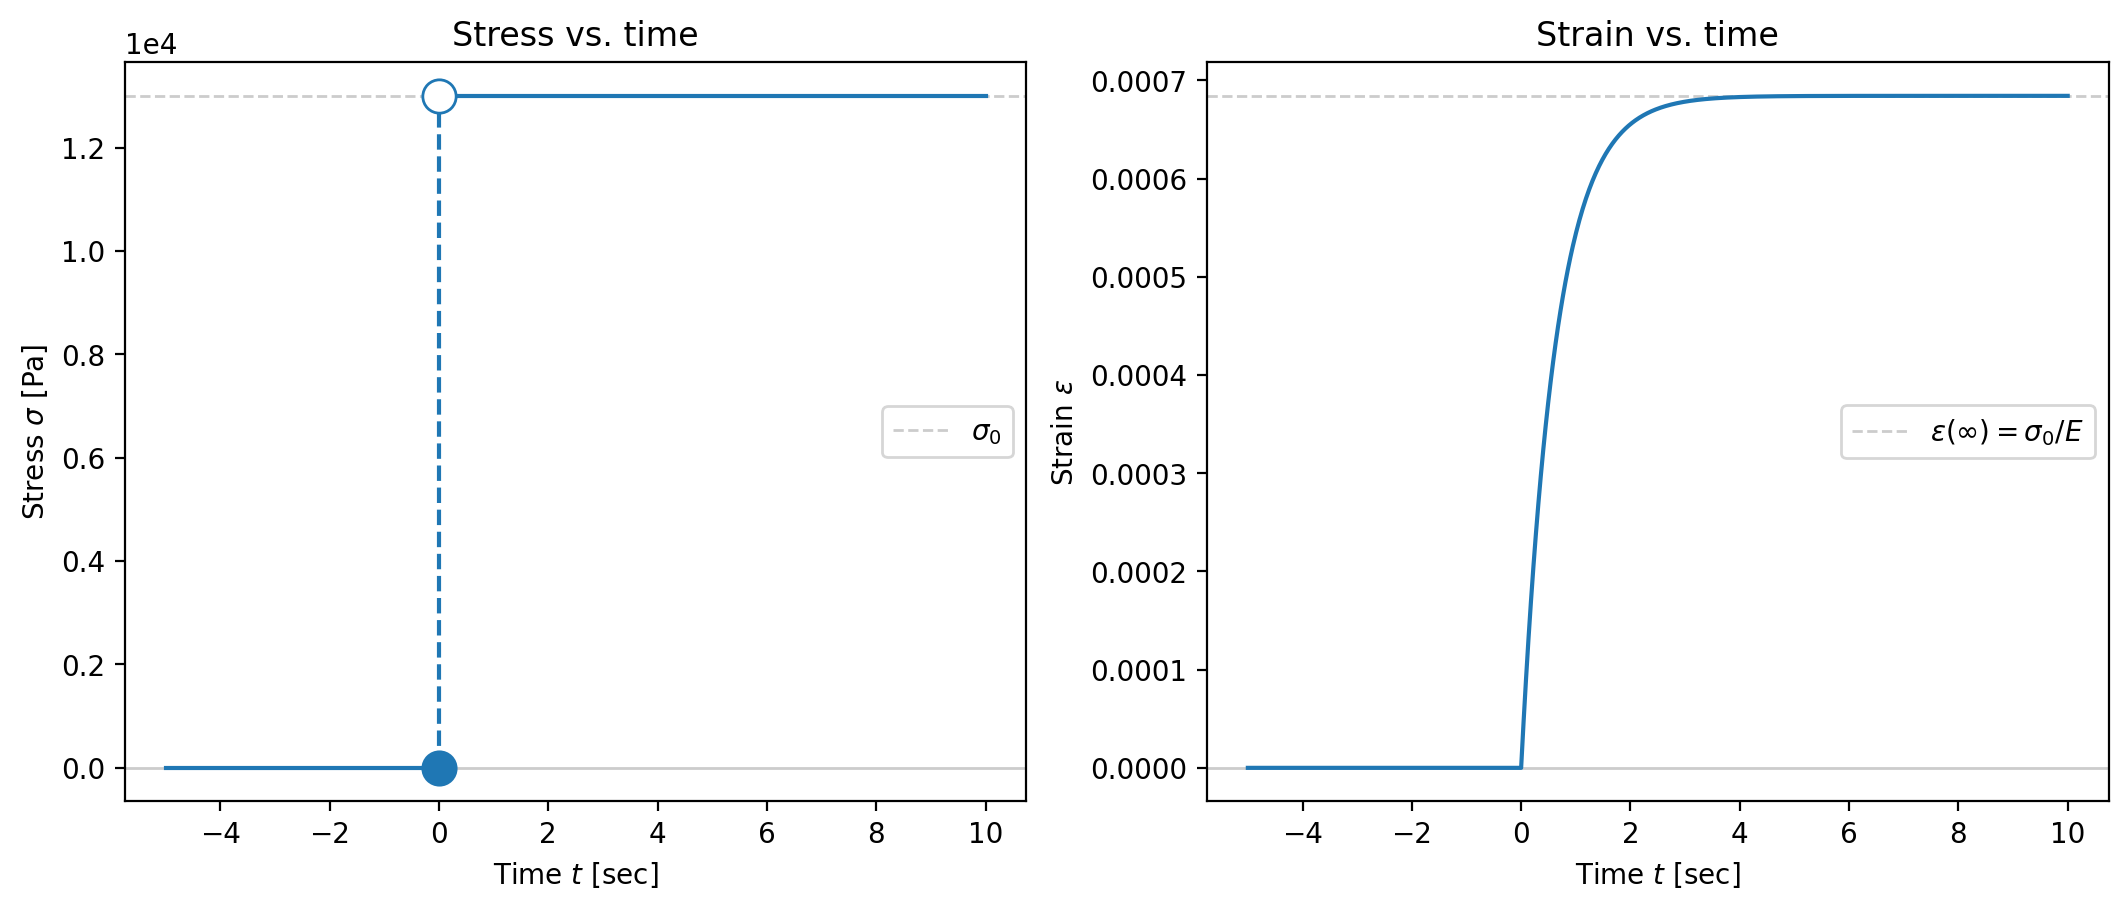

In [4]:
sigma_0 = 13E3

tau_c = mu/E
stress = sigma_0 * step(t)
def strain(t):
    return ((sigma_0/E)*(1 - np.exp(-t/tau_c))) * step(t)


figure, (stress_plot, strain_plot) = prepare_plots(amount = 2, x = "Time $t$ [sec]")

plt.sca(stress_plot)
plt.axhline(sigma_0, linestyle = '--', linewidth = 1, color = '0.8', label = r"$\sigma_0$")
plt.axhline(0, linewidth = 1, color = '0.8')
plot_discontinuous(t, stress)
plt.ylabel(r"Stress $\sigma$ [Pa]")
plt.ticklabel_format(scilimits = (-2, 2))
plt.title("Stress vs. time")
plt.legend()

plt.sca(strain_plot)
plt.axhline(sigma_0/E, linestyle = '--', linewidth = 1, color = '0.8', label = r"$\varepsilon(\infty) = \sigma_0/E$")
plt.axhline(0, linewidth = 1, color = '0.8')
plt.plot(t, strain(t))
plt.ylabel(r"Strain $\varepsilon$")
plt.title("Strain vs. time")
plt.legend();

## Step strain (stress relaxation)

Strain steps up to $\varepsilon_0$ at $t=0$:

&emsp;&emsp;$ \varepsilon(t) = \varepsilon_0S(t)$.

In response, stress steps up to $E \varepsilon_0$:

&emsp;&emsp;$\sigma(t) = E\varepsilon_0$ when $t>0$.

&emsp;&emsp;(Technically, $\sigma(t)$ also has an infinitely tall and narrow spike, an impulse $\mu\varepsilon_0\delta{(t)}$, at $t = 0$. This can't exist in the real world!)

$\sigma(t)$ doesn't drop, so the Kelvin-Voigt model has no stress relaxation! Straining it produces a predictable stress that doesn't change, just like an elastic solid.

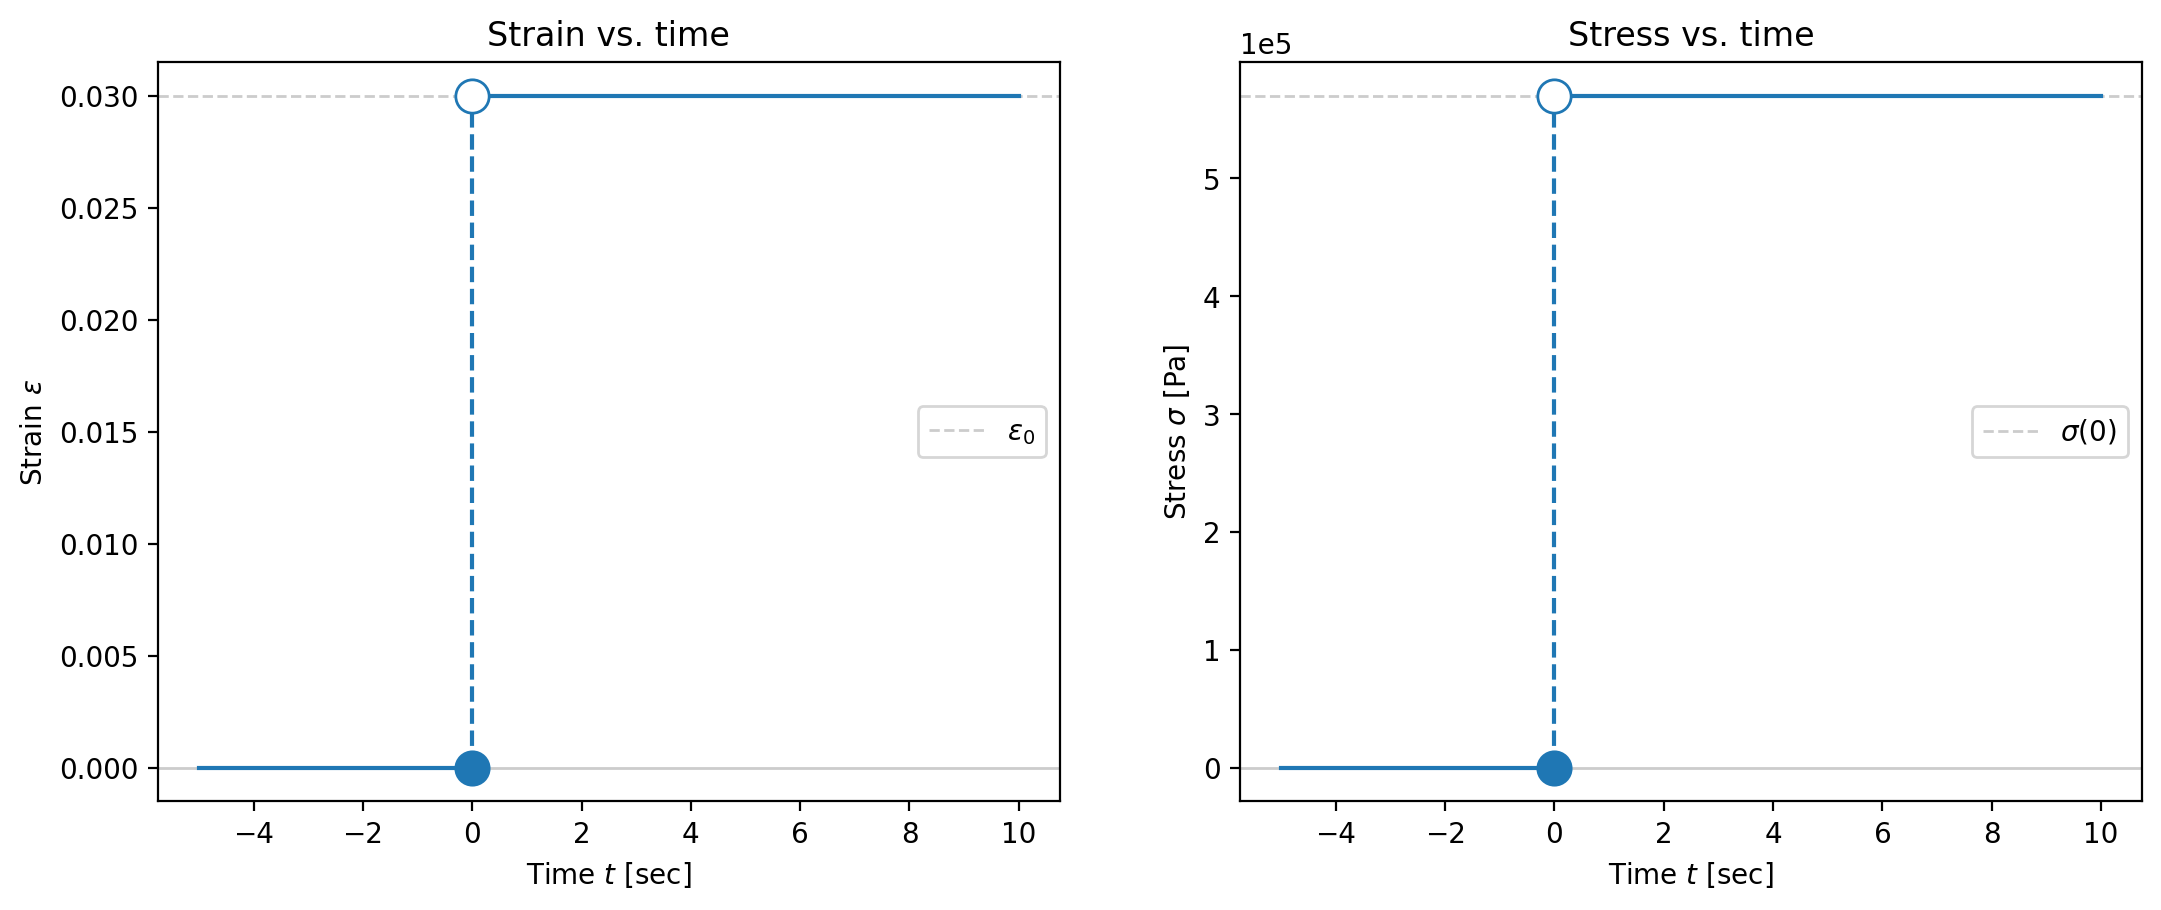

In [5]:
epsilon_0 = 0.03

strain = epsilon_0 * step(t)
def stress(t):
    return E*epsilon_0 * step(t)


figure, (strain_plot, stress_plot) = prepare_plots(amount = 2, x = "Time $t$ [sec]")
    
plt.sca(strain_plot)
plt.axhline(epsilon_0, linestyle = '--', linewidth = 1, color = '0.8', label = r"$\varepsilon_0$")
plt.axhline(0, linewidth = 1, color = '0.8')
plot_discontinuous(t, strain)
plt.ylabel(r"Strain $\varepsilon$")
plt.title("Strain vs. time")
plt.legend()

plt.sca(stress_plot)
plt.axhline(stress(0), linestyle = '--', linewidth = 1, color = '0.8', label = r"$\sigma(0)$")
plt.axhline(0, linewidth = 1, color = '0.8')
plot_discontinuous(t, stress(t))
plt.ylabel(r"Stress $\sigma$ [Pa]")
plt.ticklabel_format(scilimits = (-2, 2))
plt.title("Stress vs. time")
plt.legend();